# Amazon Review Multiclass Classification

### 0.1 Import packages

In [ ]:
# imports and connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


Mounted at /content/gdrive


### 0.2 Load data, Print shape, columns, head

In [ ]:
# Read the CSV files copied into google drive above into pandas DataFrames
test = pd.read_csv('/content/gdrive/MyDrive/CS 74/Binary Classification/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/CS 74/Binary Classification/train.csv')

In [ ]:
# Displaying basic info about data
print(train.shape)
print(train.columns)
# of couse, test data does not have 'overall' column
print(test.shape)
print(test.columns)

# Displaying first few rows of training set
train.head(10)

(29189, 14)
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'style', 'category', 'id'],
      dtype='object')
(4500, 13)
Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'image', 'style',
       'category', 'id'],
      dtype='object')


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category,id
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive,ab0
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive,ab1
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive,ab2
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive,ab3
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive,ab4
5,1,True,"04 16, 2017",068977D2F107CAA6195830CBF817EA36,9052916AEC3722F8B52039A39A11C896,657B3DA92EE342D7F1EEB4C0454E1448,i guess you get what you pay for.. i always go...,You get what you pay for..,1492300800,NaN,NaN,{'Size:': ' 2pcs 18w flood lights'},automotive,ab5
6,1,True,"12 26, 2016",241372EB529AC51C7CAF116574D69AE6,41CC78FA343926A2F7A04A32A3DE732F,C14E344017B2EC6D6B9E0AFAF8DE7912,you must remove the original black key fob cas...,Your Oriiginal Key Fob Warranty Could be Damaged!,1482710400,NaN,NaN,{'Color:': ' pink'},automotive,ab6
7,1,True,"05 17, 2017",C4100638BE92938306810B059E87487A,B009B497907125D1B14FAB2DEA079215,BEEF55AEBBD2C507C7C12EC3505432AC,"if you can't pull the wires off by hand, you w...",One Star,1494979200,NaN,NaN,NaN,automotive,ab7
8,1,True,"07 29, 2017",C87ACE9C5A7B9B9A29436F458F33EE20,6FA8FF9F211C9A01C827E09FD0D585D4,C191CB937036173A1101E5F155FB90B7,do not buy this junk! these mirrors are not ma...,Not a good product.,1501286400,NaN,NaN,NaN,automotive,ab8
9,1,True,"10 28, 2017",6D96F79D6279A1471DCAFCE62AC40901,C9E7E478351DEEC270E7F71FEB6B1F64,07FF419E7CC5C9D1722CB97D4F1551CA,not well made at all. led unit sits crooked in...,very disappointing,1509148800,NaN,NaN,{'Color:': ' Red'},automotive,ab9


### 0.3 Check for null values

In [ ]:
# note, in test pd columns 'vote', 'image', and 'style' have null values
print("# of null values in train per column")
train.isnull().sum()

# of null values in train per column


overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
id                    0
dtype: int64

In [ ]:
print(train.shape,train["asin"].nunique(),train["reviewerID"].nunique())

(29189, 14) 24102 27588


### 0.4 Preprocessing

In [ ]:
# Create new column that turns verified columns into integers for both test and train
# 1 if true, 0 if false
train['verified_num'] = train['verified'].apply(lambda x: 1 if x == 'True' else 0)
test['verified_num'] = test['verified'].apply(lambda x: 1 if x == 'True' else 0)

# One-hot encoding of category as part of preprocessing
one_hot_encoded = pd.get_dummies(train["category"], prefix="category")
train = pd.concat([train, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(test["category"], prefix="category")
test = pd.concat([test, one_hot_encoded], axis=1)

# Log unix review time
train['reviewTimeLog'] = np.log(train['unixReviewTime'] + 1)
test['reviewTimeLog'] = np.log(test['unixReviewTime'] + 1)

# Fill null values in vote
train['vote'].fillna(0, inplace=True)
test['vote'].fillna(0, inplace=True)

# Fill null values in summary
train['summary'].fillna('', inplace=True)
test['summary'].fillna('', inplace=True)

# Create summary_length
train['summary_length'] = train['summary'].apply(lambda x: len(str(x)))
test['summary_length'] = test['summary'].apply(lambda x: len(str(x)))

# Create reviewText_length
train['reviewText_length'] = train['reviewText'].apply(lambda x: len(str(x)))
test['reviewText_length'] = test['reviewText'].apply(lambda x: len(str(x)))

# log the length columns
train["summary_length_log"] = np.log(train.summary_length + 1)
test["summary_length_log"] = np.log(test.summary_length + 1)
train["reviewText_length_log"] = np.log(train.reviewText_length + 1)
test["reviewText_length_log"] = np.log(test.reviewText_length + 1)

# combine all text and log length
train['total_text'] = train['summary'] + ' ' + train['reviewText']
test['total_text'] = test['summary'] + ' ' + test['reviewText']



### 0.5 TF-IDF - reviewText

In [ ]:
# # Use TF-IDF to create reviewTextPredictBinary

# # Initalize vectorizer
# vectorizer = TfidfVectorizer()

# # Fit vectorizer and transform text into features
# train_features = vectorizer.fit_transform(train.reviewText.tolist())

# # Create model that predicts classifier just from review text
# model = LogisticRegression(max_iter = 1000)
# model.fit(train_features, train.overall.tolist())

# # Run model on train
# transformed_data = vectorizer.transform(train['reviewText'])
# predictions = model.predict(transformed_data)
# train['reviewTextPredict'] = predictions

# # Run model on validation
# test_features = vectorizer.transform(test.reviewText.tolist())
# test_predictions = model.predict(test_features)
# test['reviewTextPredict'] = test_predictions


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Create a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed

# Fit vectorizer and logistic regression in a pipeline to prevent data leakage
pipeline = make_pipeline(vectorizer, model)

# Fit the pipeline on the training data
pipeline.fit(train['reviewText'].tolist(), train['overall'].tolist())

# Run model on train and create new column with predictions
train['reviewTextPredict'] = pipeline.predict(train['reviewText'])

# Run model on test and create new column with predictions
test['reviewTextPredict'] = pipeline.predict(test['reviewText'])

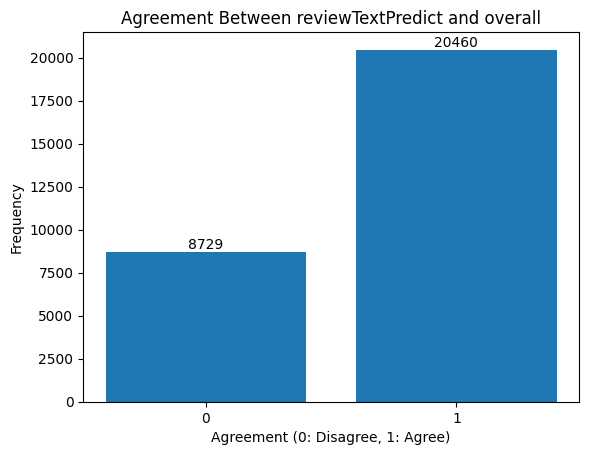

70.09% are correct


In [ ]:
# Visualize predictive accuracy of reviewTextPredict

# Create 'agree' column to identify the rows where 'reviewTextPredictBinary equals 'overallBinary'
agree = (train['reviewTextPredict'] == train['overall']).astype(int)

# Create a histogram
hist, bins = np.histogram(agree, bins=[0, 1, 2])

# Plot the histogram
plt.hist(agree, bins=[0, 1, 2], align='left', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Agreement (0: Disagree, 1: Agree)')
plt.ylabel('Frequency')
plt.title('Agreement Between reviewTextPredict and overall')
for i in range(len(hist)):
    plt.annotate(str(hist[i]), xy=(bins[i], hist[i]), ha='center', va='bottom')
plt.show()

percentage_correct = (hist[1] / sum(hist)) * 100
print(f"{percentage_correct:.2f}% are correct")

### 0.6 TF-IDF - summary

In [ ]:
# # use TF-IDF to create summaryPredictBinary

# # Initalize vectorizer.
# vectorizer = TfidfVectorizer()

# # Fit vectorizer and transform text into features
# train_features = vectorizer.fit_transform(train.summary.tolist())

# # Create model that predicts classifier from summary text
# model = LogisticRegression(max_iter = 500)
# model.fit(train_features, train.overall.tolist())

# # Run model on train
# transformed_data = vectorizer.transform(train['summary'])
# predictions = model.predict(transformed_data)
# train['summaryPredict'] = predictions

# # Run model on test
# test_features = vectorizer.transform(test.summary.tolist())
# test_predictions = model.predict(test_features)
# test['summaryPredict'] = test_predictions

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes TF-IDF vectorization and the logistic regression model
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter to ensure convergence
)

# Fit the pipeline on the training data
pipeline.fit(train['summary'].tolist(), train['overall'].tolist())

# Predict on the training data and create a new column with predictions
train['summaryPredict'] = pipeline.predict(train['summary'])

# Predict on the test data and create a new column with predictions
test['summaryPredict'] = pipeline.predict(test['summary'])

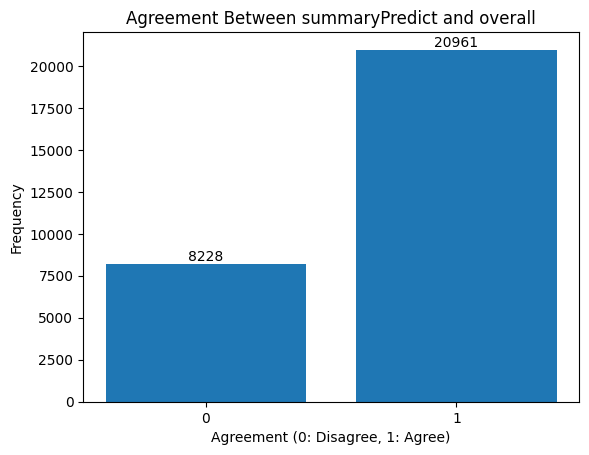

71.81% are correct


In [ ]:
# Visualize predictive accuracy of summaryPredictBinary

# Create 'agree_summ' column to identify the rows where 'summaryPredictBinary equals 'overall'
agree = (train['summaryPredict'] == train['overall']).astype(int)

# Create a histogram
hist, bins = np.histogram(agree, bins=[0, 1, 2])

# Plot the histogram
plt.hist(agree, bins=[0, 1, 2], align='left', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Agreement (0: Disagree, 1: Agree)')
plt.ylabel('Frequency')
plt.title('Agreement Between summaryPredict and overall')

# Annotate the histogram with counts
for i in range(len(hist)):
    plt.annotate(str(hist[i]), xy=(bins[i], hist[i]), ha='center', va='bottom')

plt.show()

percentage_correct = (hist[1] / sum(hist)) * 100
print(f"{percentage_correct:.2f}% are correct")

### 0.7 Sentiment Analysis

In [ ]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis and return scores
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis and add columns for 'compound', 'positive', 'negative', and 'neutral' scores
train_sentiment_summary = train['summary'].apply(analyze_sentiment)
train_sentiment_reviewText = train['reviewText'].apply(analyze_sentiment)

# # Apply sentiment analysis and add columns for 'compound', 'positive', 'negative', and 'neutral' scores
# train_sentiment_summary = train['summaryProcessed'].apply(analyze_sentiment)
# train_sentiment_reviewText = train['reviewTextProcessed'].apply(analyze_sentiment)

train['summaryCompound'] = [score['compound'] for score in train_sentiment_summary]
train['summaryPositive'] = [score['pos'] for score in train_sentiment_summary]
train['summaryNegative'] = [score['neg'] for score in train_sentiment_summary]
train['summaryNeutral'] = [score['neu'] for score in train_sentiment_summary]

train['reviewTextCompound'] = [score['compound'] for score in train_sentiment_reviewText]
train['reviewTextPositive'] = [score['pos'] for score in train_sentiment_reviewText]
train['reviewTextNegative'] = [score['neg'] for score in train_sentiment_reviewText]
train['reviewTextNeutral'] = [score['neu'] for score in train_sentiment_reviewText]

# Repeat the same process for the test DataFrame

test_sentiment_summary = test['summary'].apply(analyze_sentiment)
test_sentiment_reviewText = test['reviewText'].apply(analyze_sentiment)

test['summaryCompound'] = [score['compound'] for score in test_sentiment_summary]
test['summaryPositive'] = [score['pos'] for score in test_sentiment_summary]
test['summaryNegative'] = [score['neg'] for score in test_sentiment_summary]
test['summaryNeutral'] = [score['neu'] for score in test_sentiment_summary]

test['reviewTextCompound'] = [score['compound'] for score in test_sentiment_reviewText]
test['reviewTextPositive'] = [score['pos'] for score in test_sentiment_reviewText]
test['reviewTextNegative'] = [score['neg'] for score in test_sentiment_reviewText]
test['reviewTextNeutral'] = [score['neu'] for score in test_sentiment_reviewText]

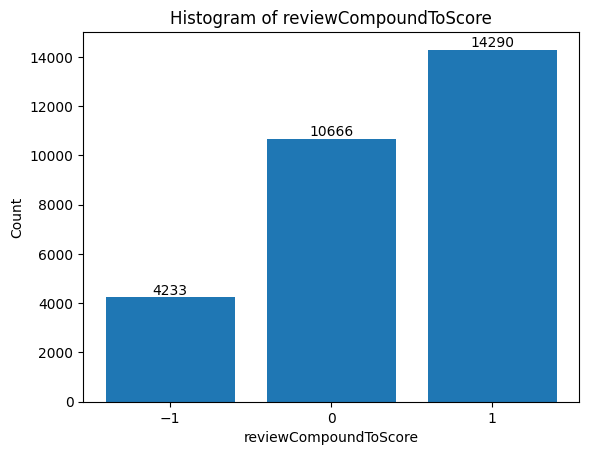

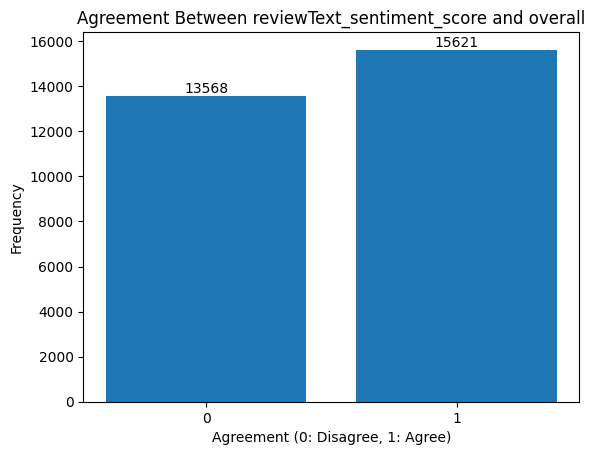

53.52% are correct
58.33% correct of those classified as high
49.06% correct of those classified as middle
48.48% correct of those classified as low


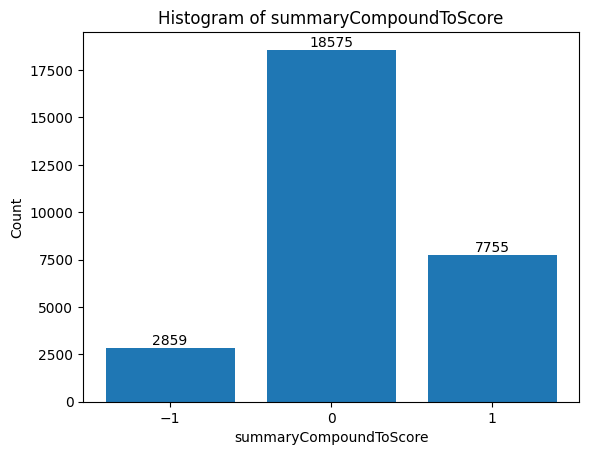

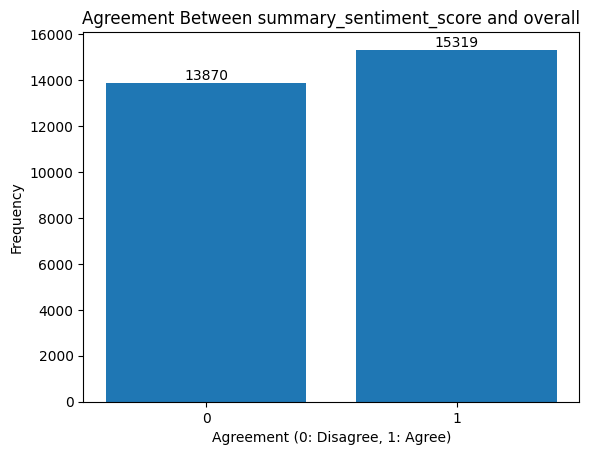

52.48% are correct
66.74% correct of those classified as high
49.69% correct of those classified as middle
42.50% correct of those classified as low


In [ ]:
def map_to_score_review(compound_value):
    if compound_value > .5:
        return 1
    elif compound_value > -.4:
        return 0
    else:
        return -1

def map_to_score_summary(compound_value):
    if compound_value > .4:
        return 1
    elif compound_value > -.4:
        return 0
    else:
        return -1

def check_agreement(row, column):
    if (row[column] == 1 and row["overall"] in [4,5]) or \
       (row[column] == 0 and row["overall"] in [2,3]) or \
       (row[column] == -1 and row["overall"] in [1]):
        return 1
    else:
        return 0
def percentClassCorrect(value, column):
  filtered_rows = train[train[column] == value]
  total_filtered_rows = len(filtered_rows)
  agree = filtered_rows.apply(lambda row: check_agreement(row, "reviewCompoundToScore"), axis=1)
  percentage_agreement = (agree.sum() / total_filtered_rows) * 100
  return percentage_agreement


# ReviewTextCompound to Transform
test["reviewCompoundToScore"] = test['reviewTextCompound'].apply(map_to_score_review)
train["reviewCompoundToScore"] = train['reviewTextCompound'].apply(map_to_score_review)
agree = train.apply(lambda row: check_agreement(row, "reviewCompoundToScore"), axis=1)

plt.hist(train["reviewCompoundToScore"], bins=[-1, 0, 1, 2], align='left', rwidth=0.8)

# Add labels to the bars
for i in range(-1, 2):
    count = (train["reviewCompoundToScore"] == i).sum()
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel("reviewCompoundToScore")
plt.xticks([-1, 0, 1])
plt.ylabel("Count")
plt.title("Histogram of reviewCompoundToScore")

# Show the plot.
plt.show()

# Create a histogram
hist, bins = np.histogram(agree, bins=[0, 1, 2])

# Plot the histogram
plt.hist(agree, bins=[0, 1, 2], align='left', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Agreement (0: Disagree, 1: Agree)')
plt.ylabel('Frequency')
plt.title('Agreement Between reviewText_sentiment_score and overall')

# Annotate the histogram with counts
for i in range(len(hist)):
    plt.annotate(str(hist[i]), xy=(bins[i], hist[i]), ha='center', va='bottom')

plt.show()

percentage_correct = (hist[1] / sum(hist)) * 100
print(f"{percentage_correct:.2f}% are correct")
percentage_correct = percentClassCorrect(1,"reviewCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as high")
percentage_correct = percentClassCorrect(0,"reviewCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as middle")
percentage_correct = percentClassCorrect(-1,"reviewCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as low")


# Summary
# ReviewTextCompound to Transform
test["summaryCompoundToScore"] = test['summaryCompound'].apply(map_to_score_summary)
train["summaryCompoundToScore"] = train['summaryCompound'].apply(map_to_score_summary)
agree = train.apply(lambda row: check_agreement(row, "summaryCompoundToScore"), axis=1)


plt.hist(train["summaryCompoundToScore"], bins=[-1, 0, 1, 2], align='left', rwidth=0.8)

# Add labels to the bars
for i in range(-1, 2):
    count = (train["summaryCompoundToScore"] == i).sum()
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel("summaryCompoundToScore")
plt.xticks([-1, 0, 1])
plt.ylabel("Count")
plt.title("Histogram of summaryCompoundToScore")

# Show the plot.
plt.show()



# Create a histogram
hist, bins = np.histogram(agree, bins=[0, 1, 2])

# Plot the histogram
plt.hist(agree, bins=[0, 1, 2], align='left', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Agreement (0: Disagree, 1: Agree)')
plt.ylabel('Frequency')
plt.title('Agreement Between summary_sentiment_score and overall')

# Annotate the histogram with counts
for i in range(len(hist)):
    plt.annotate(str(hist[i]), xy=(bins[i], hist[i]), ha='center', va='bottom')

plt.show()

percentage_correct = (hist[1] / sum(hist)) * 100
print(f"{percentage_correct:.2f}% are correct")
percentage_correct = percentClassCorrect(1,"summaryCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as high")
percentage_correct = percentClassCorrect(0,"summaryCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as middle")
percentage_correct = percentClassCorrect(-1,"summaryCompoundToScore")
print(f"{percentage_correct:.2f}% correct of those classified as low")


In [ ]:
train['binary_reviewText_sentiment_score'] = train['reviewTextCompound'].apply(lambda score: 1 if score > 0 else 0 if score < 0 else np.random.randint(2))
test['binary_reviewText_sentiment_score'] = test['reviewTextCompound'].apply(lambda score: 1 if score > 0 else 0 if score < 0 else np.random.randint(2))
train['binary_summary_sentiment_score'] = train['summaryCompound'].apply(lambda score: 1 if score > 0 else 0 if score < 0 else np.random.randint(2))
test['binary_summary_sentiment_score'] = test['summaryCompound'].apply(lambda score: 1 if score > 0 else 0 if score < 0 else np.random.randint(2))

# Part 1

## 1.1 Visualize Data

### 1.1.1 Visualize Columns

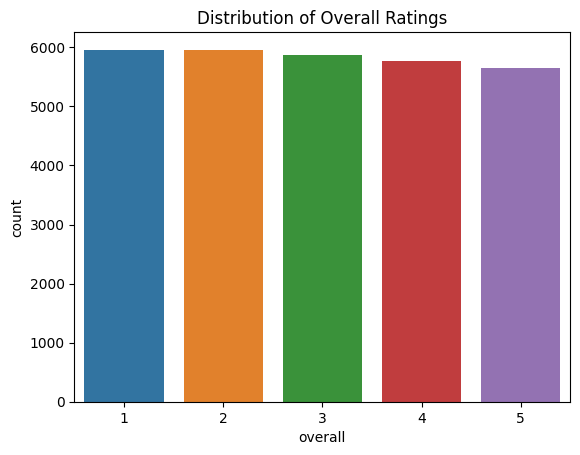

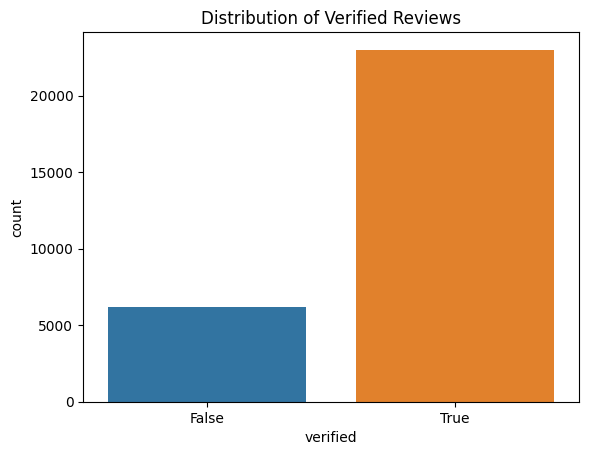

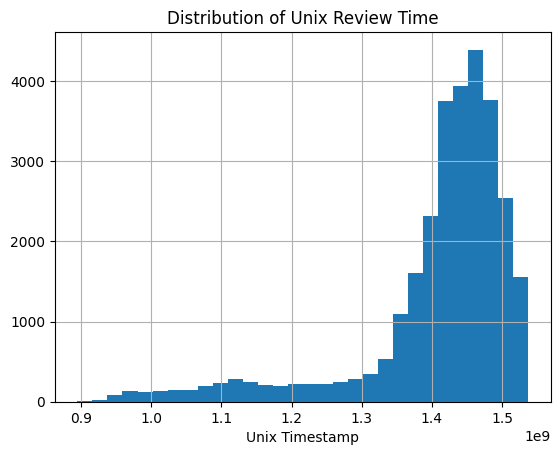

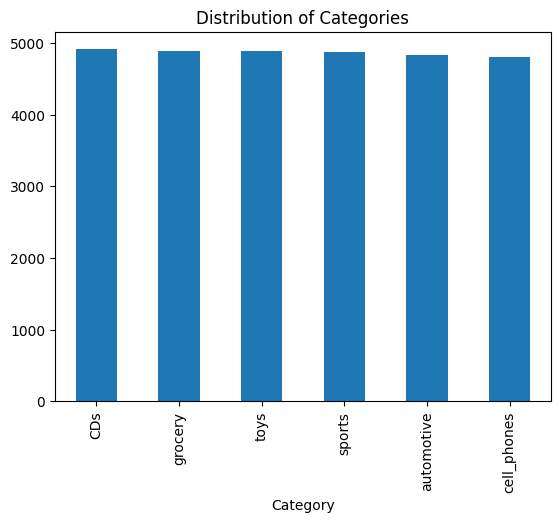

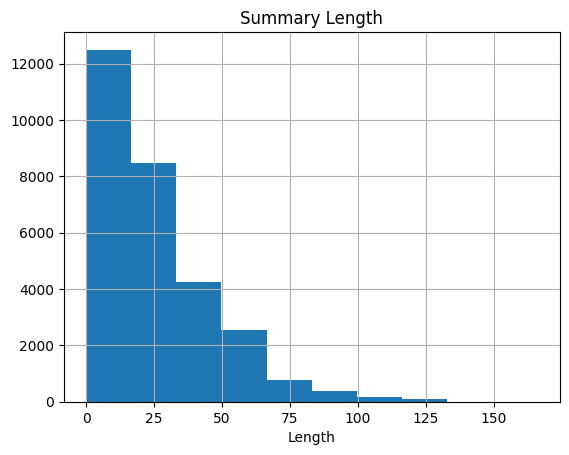

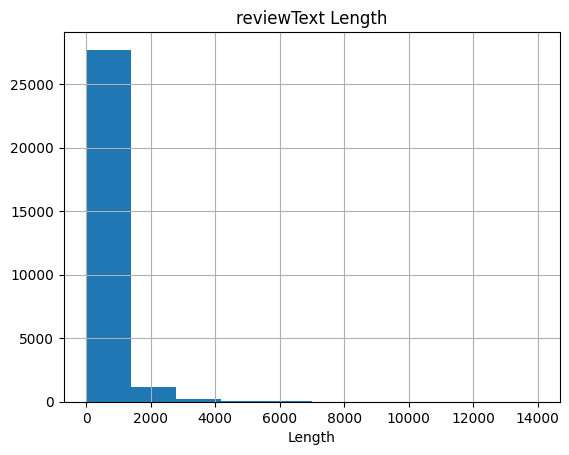

In [ ]:
# Visualize 'overall'
sns.countplot(x='overall', data=train)
plt.title('Distribution of Overall Ratings')
plt.show()

# Visualize the 'verified' attribute
sns.countplot(x='verified', data=train)
plt.title('Distribution of Verified Reviews')
plt.show()

# Visualize the 'unixReviewTime' attribute
train['unixReviewTime'].hist(bins=30)
plt.title('Distribution of Unix Review Time')
plt.xlabel('Unix Timestamp')
plt.show()

# Visualize the 'category id' attribute
train['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.show()

# Create a figure for the summary_length plot
train['summary_length'].hist(bins=10)
plt.title('Summary Length')
plt.xlabel('Length')
plt.show()

# Create a figure for the reviewText_length plot
train['reviewText_length'].hist(bins=10)
plt.title('reviewText Length')
plt.xlabel('Length')
plt.show()

### 1.1.2 Visualize Relationship w/ Overall

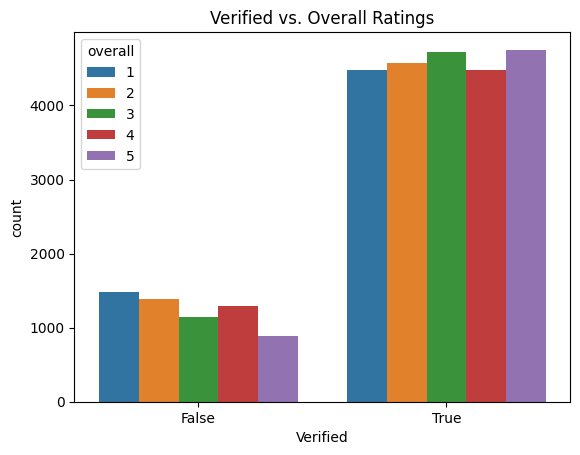

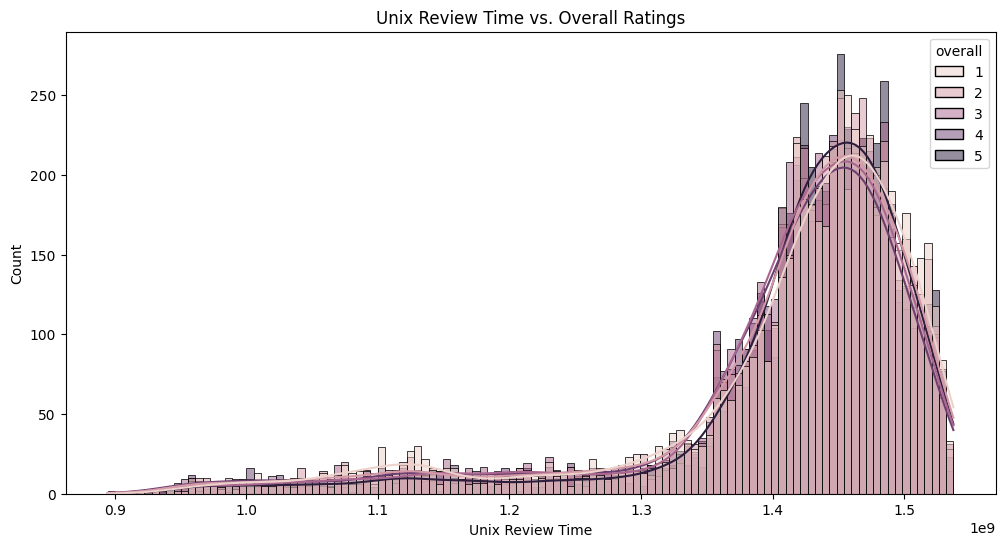

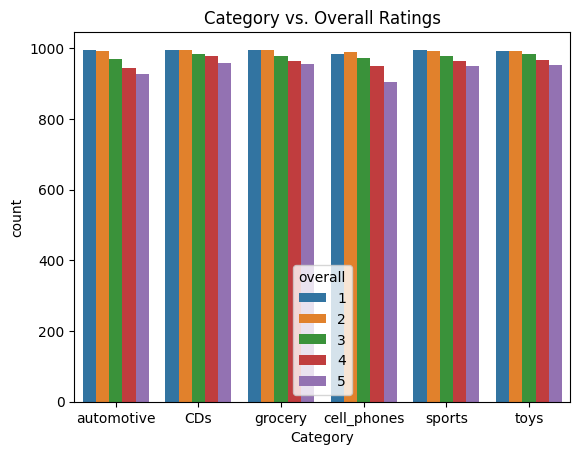

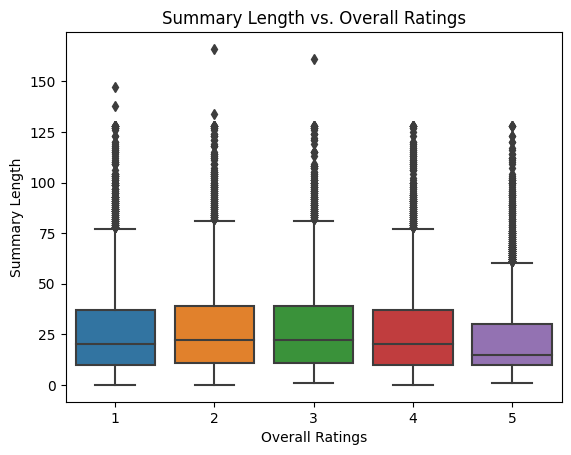

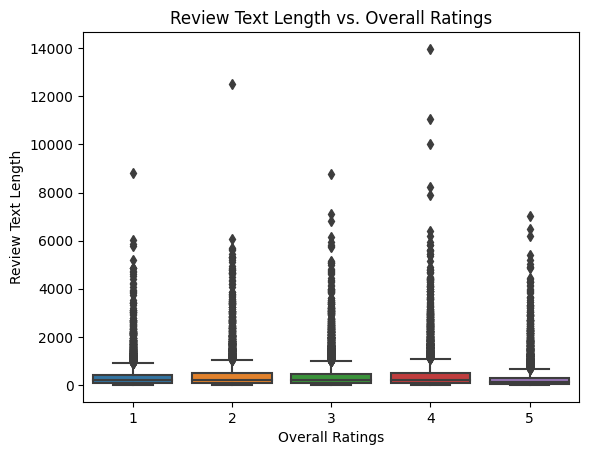

In [ ]:
# 'verified' vs. overall
sns.countplot(data=train, x='verified', hue='overall')
plt.title('Verified vs. Overall Ratings')
plt.xlabel('Verified')
plt.show()

# 'unixReviewTime' vs. overall
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='unixReviewTime', hue='overall', kde=True)
plt.title('Unix Review Time vs. Overall Ratings')
plt.xlabel('Unix Review Time')
plt.show()

# 'category' vs. overall
sns.countplot(data=train, x='category', hue='overall')
plt.title('Category vs. Overall Ratings')
plt.xlabel('Category')
plt.show()

# 'summary_length' vs. overall
sns.boxplot(data=train, x='overall', y='summary_length')
plt.title('Summary Length vs. Overall Ratings')
plt.xlabel('Overall Ratings')
plt.ylabel('Summary Length')
plt.show()

# 'reviewText_length' vs. overall
sns.boxplot(data=train, x='overall', y='reviewText_length')
plt.title('Review Text Length vs. Overall Ratings')
plt.xlabel('Overall Ratings')
plt.ylabel('Review Text Length')
plt.show()

## 1.2 Create Model

### 1.2.1 Model Preparation

In [ ]:
train.columns

Index(['overall', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'image', 'style',
       'category', 'id', 'reviewTextPredict', 'verified_num', 'category_CDs',
       'category_automotive', 'category_cell_phones', 'category_grocery',
       'category_sports', 'category_toys', 'reviewTimeLog', 'summary_length',
       'reviewText_length', 'summary_length_log', 'reviewText_length_log',
       'year', 'month', 'day', 'dayofweek', 'summaryPredict',
       'summaryCompound', 'summaryPositive', 'summaryNegative',
       'summaryNeutral', 'reviewTextCompound', 'reviewTextPositive',
       'reviewTextNegative', 'reviewTextNeutral', 'reviewCompoundToScore',
       'summaryCompoundToScore'],
      dtype='object')

In [ ]:
# Define features
features = ['reviewTextPredict', 'verified_num', 'reviewTimeLog','summaryPredict','summary_length_log', 'reviewText_length_log', 'vote', 'category_CDs', 'category_automotive', 'category_cell_phones',
            'category_grocery', 'category_sports', 'category_toys', 'summaryCompoundToScore','reviewCompoundToScore', 'summaryCompound', 'reviewTextCompound','summaryPositive', 'summaryNegative', 'summaryNeutral',
            'reviewTextNeutral', 'reviewTextPositive', 'reviewTextNegative']

In [ ]:
# Split into training and test (use for testing models)
X_train, X_test, y_train, y_test = train_test_split(train[features], train['overall'], test_size=0.2, random_state=42)
classes = np.array([1,2,3,4,5])

### 1.2.3 Random Forest Classifier

In [ ]:
# Define the hyperparameter grid using np.arange
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 25, 50],
    'min_samples_split': [5, 15, 30],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create a Random Forest model
model = RandomForestClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the mean accuracy from cross-validation
mean_accuracy = grid_search.best_score_

print("Random Forest Model with Hyperparameter Tuning and K-fold Cross-Validation:")
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Accuracy: {mean_accuracy}')

# Now, let's evaluate the model on the validation and test sets
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test['RF_Predict'] = best_model.predict(test[features])

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model (Validation Set):")
print(f'Validation Accuracy: {accuracy}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


submission_data = {'id': test['id'], 'pred': test['RF_Predict']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("RF_Predict.csv", index = False)

KeyboardInterrupt: ignored

### 1.2.3 Logistic Regression

In [ ]:
from sklearn.metrics import roc_auc_score
# Define the hyperparameter grid using np.arange
param_grid = {'C': np.arange(1.3, 1.7, 0.05)}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=2500)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the mean accuracy from cross-validation
mean_accuracy = grid_search.best_score_

print("Logistic Regression Model with Hyperparameter Tuning and K-fold Cross-Validation:")
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Accuracy: {mean_accuracy}')

# Now, let's evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test['LR_Pred'] = best_model.predict(test[features])

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Model (Test Set):")
print(f'Test Accuracy: {accuracy}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


submission_data = {'id': test['id'], 'pred': test['LR_Pred']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("LR_Predict.csv", index = False)

Logistic Regression Model with Hyperparameter Tuning and K-fold Cross-Validation:
Best Hyperparameters: {'C': 1.4000000000000001}
Mean Accuracy: 0.6584728680358143
Logistic Regression Model (Test Set):
Test Accuracy: 0.6519355943816375
              precision    recall  f1-score   support

           1       0.73      0.81      0.77      1233
           2       0.57      0.54      0.55      1148
           3       0.56      0.53      0.55      1195
           4       0.61      0.56      0.59      1129
           5       0.76      0.81      0.79      1133

    accuracy                           0.65      5838
   macro avg       0.65      0.65      0.65      5838
weighted avg       0.65      0.65      0.65      5838

Confusion Matrix:
[[997 142  72  14   8]
 [300 621 171  45  11]
 [ 49 271 634 224  17]
 [ 16  51 176 634 252]
 [ 11  10  73 119 920]]
Macro F1 Score: 0.6473732903997549


### 1.2.3 SVM Regression

In [ ]:
# Define the hyperparameter grid using np.arange
param_grid = {'C': np.arange(0.3, .7, 0.1)}

# Create an SVM (Support Vector Machine) model
model = SVC(probability=True)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the mean accuracy from cross-validation
mean_accuracy = grid_search.best_score_

print("SVM Model with Hyperparameter Tuning and K-fold Cross-Validation:")
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Accuracy: {mean_accuracy}')

# Now, let's evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test['SVM_Pred'] = best_model.predict(test[features])

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVM Model (Test Set):")
print(f'Test Accuracy: {accuracy}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


submission_data = {'id': test['id'], 'pred': test['SVM_Pred']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("SVM_Predict.csv", index = False)


NameError: ignored

### 1.3 Best classification with full training dataset

In [ ]:
best_hyperparameters = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 15,
    'min_samples_leaf': 2
}

best_model = RandomForestClassifier(**best_hyperparameters)

# Fit the model on your training data
best_model.fit(train[features], train['overall'])

# Use the best model for prediction
y_pred = best_model.predict(test[features])
test['RF_Predict_Full_Train'] = y_pred


submission_data = {'id': test['id'], 'pred': test['RF_Predict_Full_Train']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("RF_Predict_Full_Train.csv", index = False)

In [ ]:
features = ['reviewTextPredict', 'verified_num', 'reviewTimeLog','summaryPredict','summary_length_log', 'reviewText_length_log', 'vote', 'category_CDs', 'category_automotive', 'category_cell_phones',
            'category_grocery', 'category_sports', 'category_toys', 'summaryCompoundToScore','reviewCompoundToScore', 'summaryCompound', 'reviewTextCompound','summaryPositive', 'summaryNegative', 'summaryNeutral',
            'reviewTextNeutral', 'reviewTextPositive', 'reviewTextNegative']
# Split into training and test (use for testing models)
X_train, X_test, y_train, y_test = train_test_split(train[features], train['overall'], test_size=0.2, random_state=42)
classes = np.array([1,2,3,4,5])

# note, these are the parameters i got from actually doing grid search above
best_hyperparameters = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 15,
    'min_samples_leaf': 2
}

best_model = RandomForestClassifier(**best_hyperparameters)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
#test['RF_Predict'] = best_model.predict(test[features])

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model (Validation Set):")
print(f'Validation Accuracy: {accuracy}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


#submission_data = {'id': test['id'], 'pred': test['RF_Predict']}
#submission_df = pd.DataFrame(submission_data)
#submission_df.to_csv("RF_Predict.csv", index = False)

# .58 score

Random Forest Model (Validation Set):
Validation Accuracy: 0.7588215142171977
              precision    recall  f1-score   support

           1       0.79      0.82      0.80      1233
           2       0.70      0.70      0.70      1148
           3       0.73      0.68      0.71      1195
           4       0.73      0.75      0.74      1129
           5       0.83      0.85      0.84      1133

    accuracy                           0.76      5838
   macro avg       0.76      0.76      0.76      5838
weighted avg       0.76      0.76      0.76      5838

Confusion Matrix:
[[1006  127   57   22   21]
 [ 158  799  111   56   24]
 [  62  155  816  127   35]
 [  25   48   91  850  115]
 [  16   18   37  103  959]]


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Define your features and target variable
features = ['reviewTextPredict', 'verified_num', 'reviewTimeLog', 'summaryPredict', 'summary_length_log', 'reviewText_length_log', 'vote', 'category_CDs', 'category_automotive', 'category_cell_phones',
            'category_grocery', 'category_sports', 'category_toys', 'summaryCompoundToScore', 'reviewCompoundToScore', 'summaryCompound', 'reviewTextCompound', 'summaryPositive', 'summaryNegative', 'summaryNeutral',
            'reviewTextNeutral', 'reviewTextPositive', 'reviewTextNegative']

# Split your data into training and testing (you can use test data for validation in cross-validation)
X_train, X_test, y_train, y_test = train_test_split(train[features], train['overall'], test_size=0.2, random_state=42)

# Set up Random Forest hyperparameters grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 25, 50],
    'min_samples_split': [5, 15, 30],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create a Random Forest model
model = RandomForestClassifier()

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model and perform k-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use cross_val_score for k-fold cross-validation to evaluate the model's performance
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')

print("Random Forest Model with Hyperparameter Tuning and K-fold Cross-Validation:")
print(f'Best Hyperparameters: {best_params}')
print(f'Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f}')

# Use the best model to make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model (Test Set):")
print(f'Test Accuracy: {accuracy:.2f}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)




KeyboardInterrupt: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
import joblib  # Import joblib for model persistence

# Define your features
features = ['reviewTextPredict', 'verified_num', 'reviewTimeLog', 'summaryPredict', 'summary_length_log',
            'reviewText_length_log', 'vote', 'category_CDs', 'category_automotive', 'category_cell_phones',
            'category_grocery', 'category_sports', 'category_toys', 'summaryCompoundToScore',
            'reviewCompoundToScore', 'summaryCompound', 'reviewTextCompound', 'summaryPositive',
            'summaryNegative', 'summaryNeutral', 'reviewTextNeutral', 'reviewTextPositive', 'reviewTextNegative']

# Split your data into training and testing (you can use test data for validation in cross-validation)
X_train, X_test, y_train, y_test = train_test_split(train[features], train['overall'], test_size=0.2, random_state=42)

# Create an MLP classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,50,25),(100, 50),(200,100,50,25)],
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5)  # You can adjust the number of CV folds

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Use the best model
best_model = grid_search.best_estimator_

# Save the best MLP model to a file
joblib.dump(best_model, 'best_mlp_model.pkl')

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("MLP Model (Test Set):")
print(f'Test Accuracy: {accuracy}')
print(report)
print("Confusion Matrix:")
print(confusion)
print("Best Hyperparameters:", best_params)

# Assuming you have a 'test' DataFrame, make predictions on the test data
test['MLP'] = best_model.predict(test[features])

# Save the test predictions to a CSV file
submission_data = {'id': test['id'], 'pred': test['MLP']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("MLP_Predict.csv", index=False)


MLP Model (Test Set):
Test Accuracy: 0.750085645769099
              precision    recall  f1-score   support

           1       0.75      0.84      0.80      1233
           2       0.69      0.69      0.69      1148
           3       0.76      0.64      0.69      1195
           4       0.75      0.71      0.73      1129
           5       0.81      0.86      0.83      1133

    accuracy                           0.75      5838
   macro avg       0.75      0.75      0.75      5838
weighted avg       0.75      0.75      0.75      5838

Confusion Matrix:
[[1041  104   41   25   22]
 [ 200  791   93   38   26]
 [  81  176  769  118   51]
 [  40   64   88  800  137]
 [  21   16   27   91  978]]
Best Hyperparameters: {'alpha': 0.2, 'hidden_layer_sizes': (100, 50, 25)}


### XGBoost: 0.584

With Henry's features

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize the XGBClassifier with default parameters to start
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5)

# Fit the model with the adjusted labels
xgb_model.fit(X_train, y_train_adjusted)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Adjust predictions to match original label range
y_pred_xgb_original = y_pred_xgb + 1

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_adjusted, y_pred_xgb)
print(f'XGBoost Model Accuracy: {accuracy_xgb}')
print(classification_report(y_test_adjusted, y_pred_xgb))
print(confusion_matrix(y_test_adjusted, y_pred_xgb))

XGBoost Model Accuracy: 0.7536827680712572
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1233
           1       0.70      0.69      0.70      1148
           2       0.73      0.69      0.71      1195
           3       0.73      0.73      0.73      1129
           4       0.81      0.84      0.83      1133

    accuracy                           0.75      5838
   macro avg       0.75      0.75      0.75      5838
weighted avg       0.75      0.75      0.75      5838

[[1018  122   54   21   18]
 [ 156  788  120   53   31]
 [  68  139  819  132   37]
 [  31   48   94  821  135]
 [  15   21   39  104  954]]


In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {
        'objective': 'multi:softmax',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'num_class': 5
    }
    # The cv function should be defined elsewhere in the code, using StratifiedKFold for instance
    cv_result = cross_val_score(XGBClassifier(**params), X_train, y_train_adjusted, cv=5, scoring='accuracy')
    return cv_result.mean()

# Define the parameter bounds for the Bayesian optimizer
param_bounds = {
    'max_depth': (3, 10),
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 0.7)
}

# Initialize the optimizer
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)

# Maximize the cross-validation score
optimizer.maximize(init_points=10, n_iter=25)

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
| 1         | 0.7612    | 0.4498    | 0.9507    | 8.124     |
| 2         | 0.7642    | 0.5395    | 0.156     | 4.092     |
| 3         | 0.7607    | 0.3232    | 0.8662    | 7.208     |
| 4         | 0.7565    | 0.5832    | 0.02058   | 9.789     |
| 5         | 0.7612    | 0.633     | 0.2123    | 4.273     |
| 6         | 0.7616    | 0.3734    | 0.3042    | 6.673     |
| 7         | 0.7589    | 0.4728    | 0.2912    | 7.283     |
| 8         | 0.7601    | 0.3558    | 0.2921    | 5.565     |
| 9         | 0.7655    | 0.4824    | 0.7852    | 4.398     |
| 10        | 0.7654    | 0.5057    | 0.5924    | 3.325     |
| 11        | 0.7613    | 0.6885    | 0.6324    | 9.901     |
| 12        | 0.7647    | 0.3643    | 0.3991    | 3.606     |
| 13        | 0.7651    | 0.4301    | 0.4791    | 4.0       |
| 14        | 0.7662    | 0.4669    | 0.9968    | 3.967     |
| 15    

In [ ]:
# Define X, y, test_y w/o train/test split
X = train[features]
y = train["overall"] - 1
test_X = test[features]

# Initialize the XGBoost Classifier with the best parameters found
final_xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    max_depth=int(4),
    gamma=0.9968,
    colsample_bytree=0.4669
)

# Fit the model on the training data
final_xgb_model.fit(X, y)

# Predict on the test set, adjusting class labels if they were adjusted for training
test['XGB'] = final_xgb_model.predict(test_X) + 1  # Add 1 if y_train was adjusted

In [ ]:
# # Train the feature selection model
# feature_selector = SelectFromModel(XGBClassifier(
#     objective='multi:softmax',
#     num_class=5,
#     max_depth=4,
#     gamma=0.9968,
#     colsample_bytree=0.4669,
#     use_label_encoder=False
# ))
# feature_selector.fit(X, y)

# # Reduce training and test data to important features
# X_train_selected = feature_selector.transform(X)
# test_data_selected = feature_selector.transform(test_X)

In [ ]:
# # Train the final model on the selected features
# final_model = XGBClassifier(
#     objective='multi:softmax',
#     num_class=5,
#     max_depth=4,
#     gamma=0.9968,
#     colsample_bytree=0.4669,
#     use_label_encoder=False
# )
# final_model.fit(X_train_selected, y)

# # Predict using the final model and selected features for test data
# test['XGB'] = final_model.predict(test_data_selected) + 1  # Adjust back if needed

# Save the test predictions to a CSV file
submission_data = {'id': test['id'], 'pred': test['XGB']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("XGB_Predict_Sel.csv", index=False)

### RF Import

0.7584687971753363 on validation but 0.7592822907942166 on my other ipynb.

0.590 -- Somehow, it's 0.005 less than my other ipynb.

In [ ]:
# Define features
features = ['vote','reviewTextPredict', 'verified_num', 'category_CDs','category_automotive',
            'category_cell_phones', 'category_grocery','category_sports', 'category_toys', 'reviewTimeLog',
            'summaryPredict','summary_length_log', 'reviewText_length_log', 'summaryPositive',
            'summaryNegative', 'summaryNeutral', 'reviewTextPositive', 'reviewTextNegative',
            'reviewTextNeutral', 'summaryCompound','reviewTextCompound','binary_reviewText_sentiment_score','binary_summary_sentiment_score']#,
            # 'summaryCompoundToScore','reviewCompoundToScore']

In [ ]:
# Split into training and validation (use for testing models)
X_train, X_test, y_train, y_test = train_test_split(train[features], train['overall'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [6],
    'min_samples_leaf': [2],
    'bootstrap': [True]  # Include bootstrap parameter
}

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the mean accuracy from cross-validation
mean_accuracy = grid_search.best_score_

print("Random Forest Model with Hyperparameter Tuning and K-fold Cross-Validation:")
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Accuracy: {mean_accuracy}')

# Now, let's evaluate the model on the test set
best_model = grid_search.best_estimator_

# # W/ hard-coded parameters
# best_model = RandomForestClassifier(
#     random_state=42,
#     max_depth=10,
#     min_samples_leaf=5,
#     min_samples_split=5,
#     n_estimators=200)
# best_model.fit(X_train, y_train)

test['RF_Sentiment+Text_Predict'] = best_model.predict(test[features])
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model (Test Set):")
print(f'Test Accuracy: {accuracy}')
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate macro F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", f1_macro)

Random Forest Model with Hyperparameter Tuning and K-fold Cross-Validation:
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
Mean Accuracy: 0.7572696812121997
Random Forest Model (Test Set):
Test Accuracy: 0.7541966426858513
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      1233
           2       0.70      0.69      0.69      1148
           3       0.73      0.68      0.70      1195
           4       0.72      0.74      0.73      1129
           5       0.82      0.85      0.83      1133

    accuracy                           0.75      5838
   macro avg       0.75      0.75      0.75      5838
weighted avg       0.75      0.75      0.75      5838

Confusion Matrix:
[[1006  126   58   24   19]
 [ 154  796  114   57   27]
 [  61  155  808  131   40]
 [  30   45   90  833  131]
 [  14   22   32  105  960]]
Macro F1 Score: 0.7531503562855788


In [ ]:
submission_data = {'id': test['id'], 'pred': test['RF_Sentiment+Text_Predict']}
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv("RFNew.csv", index=False)